## Shanice Bailey
# CryoSat-2: Dynamic Topography of Southern Ocean

My Binder link: https://hub.mybinder.org/user/stb2145-rces-finalproject-mb7ozrhw/tree

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from glob import glob
import xarray as xr
import cartopy.crs as ccrs #cartopy coord ref sys
import cartopy
import cartopy.feature as cfeature

In [2]:
! wget http://rkwok.jpl.nasa.gov/rgpsftp/cryosat2_topo/CS2_combined_Southern_Ocean_2011-2016.nc

URL transformed to HTTPS due to an HSTS policy
--2018-12-12 00:50:31--  https://rkwok.jpl.nasa.gov/rgpsftp/cryosat2_topo/CS2_combined_Southern_Ocean_2011-2016.nc
Resolving rkwok.jpl.nasa.gov (rkwok.jpl.nasa.gov)... 128.149.112.22
Connecting to rkwok.jpl.nasa.gov (rkwok.jpl.nasa.gov)|128.149.112.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26095988 (25M) [application/x-netcdf]
Saving to: ‘CS2_combined_Southern_Ocean_2011-2016.nc’

CS2_combined_Southe 100%[===================>]  24.89M  41.6MB/s    in 0.6s    

2018-12-12 00:50:32 (41.6 MB/s) - ‘CS2_combined_Southern_Ocean_2011-2016.nc’ saved [26095988/26095988]



In [3]:
cs2 = 'CS2_combined_Southern_Ocean_2011-2016.nc'
ds = xr.open_dataset(cs2)
ds = ds.set_coords(['Latitude', 'Longitude', 'Area'])
ds['date'] = pd.date_range('2011-01', periods=ds.date.size,freq='MS')
ds

<xarray.Dataset>
Dimensions:    (X: 205, Y: 215, date: 72)
Coordinates:
  * date       (date) datetime64[ns] 2011-01-01 2011-02-01 2011-03-01 ...
  * X          (X) float32 -4475.0 -4425.0 -4375.0 -4325.0 -4275.0 -4225.0 ...
  * Y          (Y) float32 -4975.0 -4925.0 -4875.0 -4825.0 -4775.0 -4725.0 ...
    Latitude   (Y, X) float32 ...
    Longitude  (Y, X) float32 ...
    Area       (Y, X) float32 ...
Data variables:
    DOT        (date, Y, X) float32 ...
    SLA        (date, Y, X) float32 ...
    MDT        (Y, X) float32 ...
Attributes:
    Title:        CS2_combined_Southern_Ocean_2011-2016.nc
    Description:  Monthly merged dynamic ocean topography, sea level anomaly ...
    Projection::  Southern hemisphere SSM/I polar stereographic grid (https:/...
    Reference:    Armitage et al., Dynamic topography and sea level anomalies...

In [5]:
ds.attrs

OrderedDict([('Title', 'CS2_combined_Southern_Ocean_2011-2016.nc'),
             ('Description',
              'Monthly merged dynamic ocean topography, sea level anomaly and mean sea surface records of the ice-covered and ice-free Southern Ocean between 2011-2016 from CryoSat-2 radar altimetry.'),
             ('Projection:',
              'Southern hemisphere SSM/I polar stereographic grid (https://nsidc.org/data/polar-stereo/ps_grids.html). Resolution: 50km. Bottom left corner: [-4500,-5000]; top right corner: [5750, 5750].'),
             ('Reference',
              'Armitage et al., Dynamic topography and sea level anomalies of the Southern Ocean: Variability and teleconnections, JGR-Oceans.')])

In [4]:
#checking projection type
ds.attrs['Projection:']

'Southern hemisphere SSM/I polar stereographic grid (https://nsidc.org/data/polar-stereo/ps_grids.html). Resolution: 50km. Bottom left corner: [-4500,-5000]; top right corner: [5750, 5750].'

In [6]:
ds.MDT

<xarray.DataArray 'MDT' (Y: 215, X: 205)>
array([[     nan, 9.321053, 8.922684, ...,      nan,      nan,      nan],
       [9.393326, 9.128281, 8.790092, ...,      nan,      nan,      nan],
       [9.084267, 8.876312, 8.625931, ...,      nan,      nan,      nan],
       ...,
       [4.762772, 4.755409, 4.733826, ...,      nan,      nan,      nan],
       [4.951439, 4.958145, 4.977036, ...,      nan,      nan,      nan],
       [     nan, 5.082672, 5.118813, ...,      nan,      nan,      nan]],
      dtype=float32)
Coordinates:
  * X          (X) float32 -4475.0 -4425.0 -4375.0 -4325.0 -4275.0 -4225.0 ...
  * Y          (Y) float32 -4975.0 -4925.0 -4875.0 -4825.0 -4775.0 -4725.0 ...
    Latitude   (Y, X) float32 ...
    Longitude  (Y, X) float32 ...
    Area       (Y, X) float32 ...
Attributes:
    units:       cm
    fill_value:  NaN

In [7]:
ccrs.Stereographic?

Init signature: ccrs.Stereographic(central_latitude=0.0, central_longitude=0.0, false_easting=0.0, false_northing=0.0, true_scale_latitude=None, scale_factor=None, globe=None)
Docstring:     
Define a projected coordinate system with flat topology and Euclidean
distance.
Init docstring:
Parameters
----------
proj4_params: iterable of key-value pairs
    The proj4 parameters required to define the
    desired CRS.  The parameters should not describe
    the desired elliptic model, instead create an
    appropriate Globe instance. The ``proj4_params``
    parameters will override any parameters that the
    Globe defines.
globe: :class:`~cartopy.crs.Globe` instance, optional
    If omitted, the default Globe instance will be created.
    See :class:`~cartopy.crs.Globe` for details.
File:           /opt/conda/lib/python3.6/site-packages/cartopy/crs.py
Type:           ABCMeta


In [8]:
#Changing X & Y from km to m
ds_scaled = ds.copy()
ds_scaled['X'] = ds['X'] * 1000
ds_scaled['Y'] = ds['Y'] * 1000
# how to change unit names from km to m

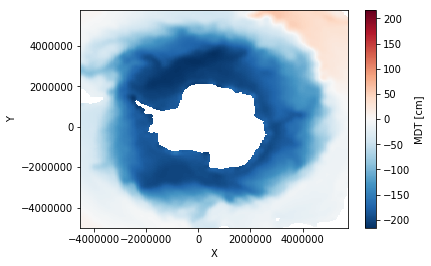

In [9]:
ds_scaled.MDT.plot()

In [10]:
#.values.item()?
# is this value from Latitude value itself or is it of Y?
#trying to find center point of each coord
center_point = {'X':len(ds.X)//2, 'Y':len(ds.Y)//2}
center_lat = ds.Latitude.isel(**center_point).values.item()
center_lat

-83.2791519165039

Text(0.5,1,'Using stereographic proj instead of SouthPolar')

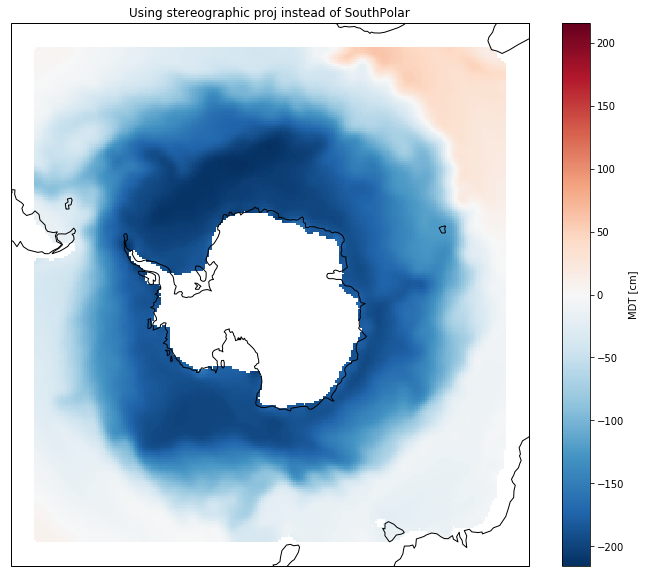

In [11]:
proj = ccrs.Stereographic(central_longitude=0, central_latitude=center_lat, false_northing=8e5)

plt.figure(figsize=(12, 10))
ax = plt.axes(projection=proj)
ax.coastlines()
ds_scaled.MDT.plot()
plt.title('Using stereographic proj instead of SouthPolar')
#ax.add_feature(cfeature.LAND, facecolor='0.9', edgecolor='k')

Text(0.5,1,'Using Pcolormesh')

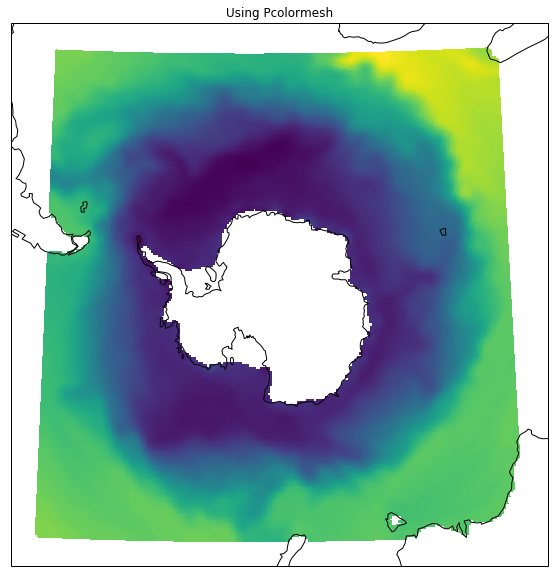

In [12]:
plt.figure(figsize=(12,10))

ax = plt.axes(projection=proj)
ax.coastlines()
ax.pcolormesh(ds_scaled.Longitude, ds_scaled.Latitude, ds_scaled.MDT, transform=ccrs.PlateCarree())
plt.title('Using Pcolormesh')

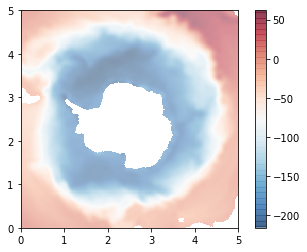

In [13]:
contours = plt.contour(ds.Longitude, ds.Latitude, ds.MDT, levels=20, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(ds.MDT, extent=[0, 5, 0, 5], origin='lower',
          cmap='RdBu_r', alpha=0.5)
plt.colorbar();

## Figure 4a)

In [14]:
#ds.Longitude.plot()

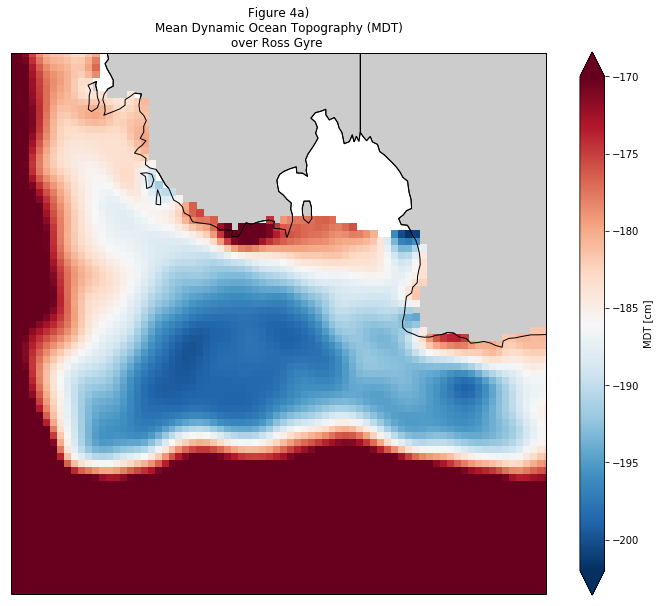

In [15]:
extent = [-200,-140,-55,-90]
plt.figure(figsize=(12,10))

ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='0.8', edgecolor='k')
ax.set_extent(extent, crs=ccrs.PlateCarree())
ds.MDT.plot(x='Longitude', y='Latitude', transform=ccrs.PlateCarree(),cmap='RdBu_r', vmin=-202, vmax=-170)
plt.title('Figure 4a)\nMean Dynamic Ocean Topography (MDT)\nover Ross Gyre ');

>**Figure 4a).** The mean dynamic ocean topography (cm) of the Ross Gyre over the period of 2011-2016, the color scale is purposefully saturated to highlight the Gyre. There is a dip in center of the cyclonic gyre.

## Figure 5a)

Text(0.5,1,'Figure 5a\nMean Dynamic Ocean Topography (MDT)\nover Weddell Gyre)')

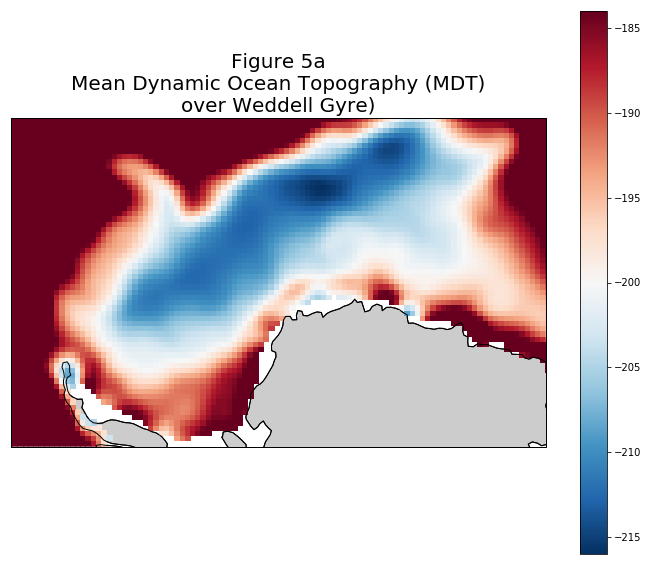

In [16]:
#missing contour lines and 1km isobath line
#How to add thick, black line of 1km isobath?
#How to fix colorbar size
extent = [-50,33,-55,-79]
plt.figure(figsize=(12,10))

ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='0.8', edgecolor='k')
ax.set_extent(extent, crs=ccrs.PlateCarree())

mdt_cs = ax.pcolormesh(ds.Longitude, ds.Latitude, ds.MDT, transform=ccrs.PlateCarree(), cmap='RdBu_r', 
                                                                                        vmin=-216, vmax=-184)
ax.contour(ds.Longitude, ds.Latitude, ds.MDT, levels=20, colors='k')
plt.colorbar(mdt_cs)
plt.title('Figure 5a\nMean Dynamic Ocean Topography (MDT)\nover Weddell Gyre)', fontsize=20)

>**Figure 5a).** The mean dynamic ocean topography (cm) of the Weddell Gyre over the period of 2011-2016, the color scale is purposefully saturated to highlight the Weddell Gyre. There is a dip in center of the cyclonic gyre.

In [17]:
#ds.variables

In [18]:
ds.MDT

<xarray.DataArray 'MDT' (Y: 215, X: 205)>
array([[     nan, 9.321053, 8.922684, ...,      nan,      nan,      nan],
       [9.393326, 9.128281, 8.790092, ...,      nan,      nan,      nan],
       [9.084267, 8.876312, 8.625931, ...,      nan,      nan,      nan],
       ...,
       [4.762772, 4.755409, 4.733826, ...,      nan,      nan,      nan],
       [4.951439, 4.958145, 4.977036, ...,      nan,      nan,      nan],
       [     nan, 5.082672, 5.118813, ...,      nan,      nan,      nan]],
      dtype=float32)
Coordinates:
  * X          (X) float32 -4475.0 -4425.0 -4375.0 -4325.0 -4275.0 -4225.0 ...
  * Y          (Y) float32 -4975.0 -4925.0 -4875.0 -4825.0 -4775.0 -4725.0 ...
    Latitude   (Y, X) float32 -33.2011 -33.441322 -33.68056 -33.918777 ...
    Longitude  (Y, X) float32 -138.02869 -138.34859 -138.67169 -138.99803 ...
    Area       (Y, X) float32 ...
Attributes:
    units:       cm
    fill_value:  NaN

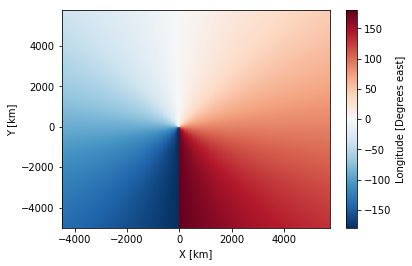

In [19]:
ds.Longitude.plot()

#Lon, Lat are 2D variables, don't really worry about them being variables in this case
ds.assign_coords(ds.Longitude)

ds.Longitude.sel([-78,20], method='nearest')

In [20]:
ds.attrs

OrderedDict([('Title', 'CS2_combined_Southern_Ocean_2011-2016.nc'),
             ('Description',
              'Monthly merged dynamic ocean topography, sea level anomaly and mean sea surface records of the ice-covered and ice-free Southern Ocean between 2011-2016 from CryoSat-2 radar altimetry.'),
             ('Projection:',
              'Southern hemisphere SSM/I polar stereographic grid (https://nsidc.org/data/polar-stereo/ps_grids.html). Resolution: 50km. Bottom left corner: [-4500,-5000]; top right corner: [5750, 5750].'),
             ('Reference',
              'Armitage et al., Dynamic topography and sea level anomalies of the Southern Ocean: Variability and teleconnections, JGR-Oceans.')])

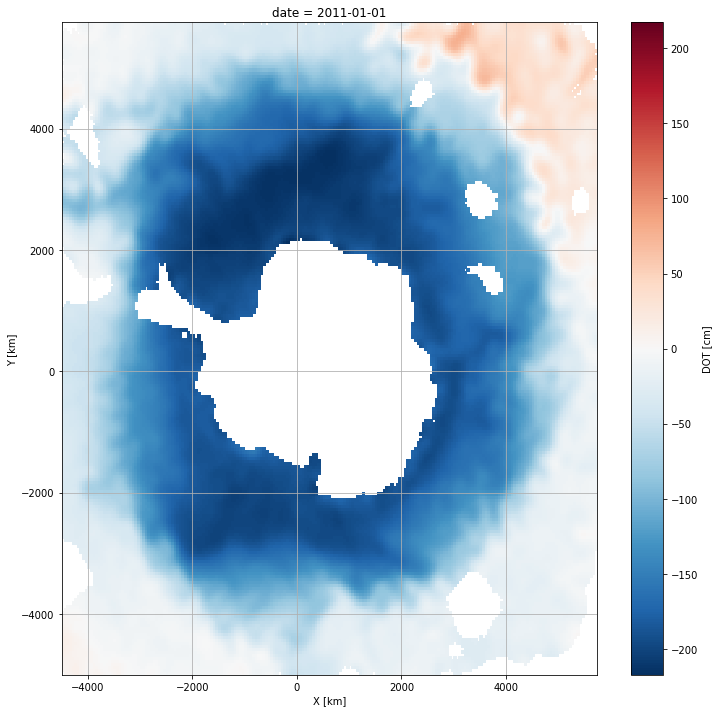

In [21]:
ds.DOT[0].plot(figsize=(12,12))
plt.grid()

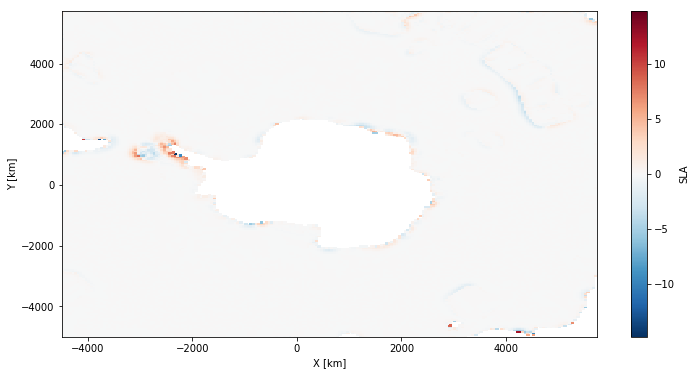

In [22]:
ds.SLA.mean(dim='date').plot(figsize=(12,6))

## Figure 6b)

### Calculating Gyre Depth
= mSLA_211 - mSLA_205

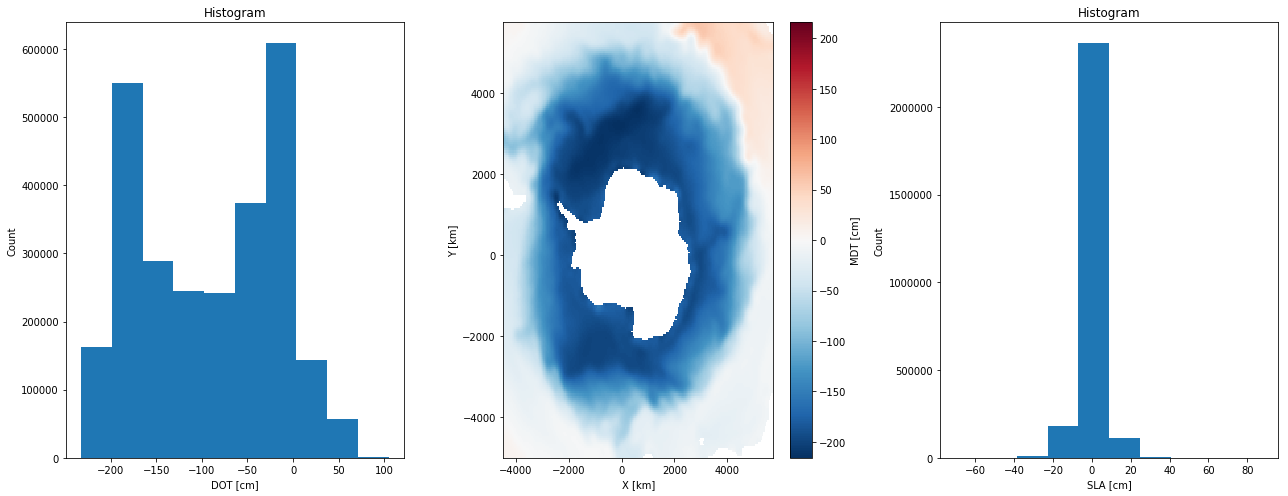

In [23]:
#trying to see if DOT = MDT + SLA
fig, ax = plt.subplots(ncols=3, figsize=(18,7))
ds.DOT.plot(ax=ax[0])
ds.MDT.plot(ax=ax[1])
ds.SLA.plot(ax=ax[2])
plt.tight_layout()

In [24]:
#Monthly mean SLA within -211cm, and at -205cm, mean DOT (MDT)
light_blue = (ds.where(ds.DOT<=-211)).groupby('date.month').mean(dim='date')
dark_blue = (ds.where(ds.DOT==-205, 999)).groupby('date.month').mean(dim='date')

In [25]:
light_blue

<xarray.Dataset>
Dimensions:    (X: 205, Y: 215, month: 12)
Coordinates:
  * X          (X) float32 -4475.0 -4425.0 -4375.0 -4325.0 -4275.0 -4225.0 ...
  * Y          (Y) float32 -4975.0 -4925.0 -4875.0 -4825.0 -4775.0 -4725.0 ...
    Latitude   (Y, X) float32 -33.2011 -33.441322 -33.68056 -33.918777 ...
    Longitude  (Y, X) float32 -138.02869 -138.34859 -138.67169 -138.99803 ...
    Area       (Y, X) float32 1593.5522 1600.7418 1607.8981 1615.0198 ...
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    DOT        (month, Y, X) float32 nan nan nan nan nan nan nan nan nan nan ...
    SLA        (month, Y, X) float32 nan nan nan nan nan nan nan nan nan nan ...
    MDT        (month, Y, X) float32 nan nan nan nan nan nan nan nan nan nan ...

(array([     0.,      0.,      0.,      0.,      0., 528900.,      0.,
             0.,      0.,      0.]),
 array([998.5, 998.6, 998.7, 998.8, 998.9, 999. , 999.1, 999.2, 999.3,
        999.4, 999.5], dtype=float32),
 <a list of 10 Patch objects>)

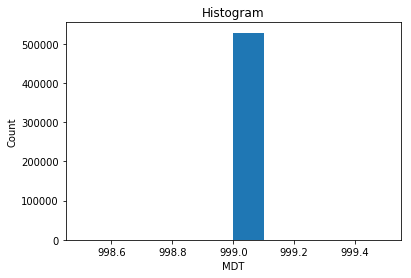

In [26]:
dark_blue.MDT.plot()

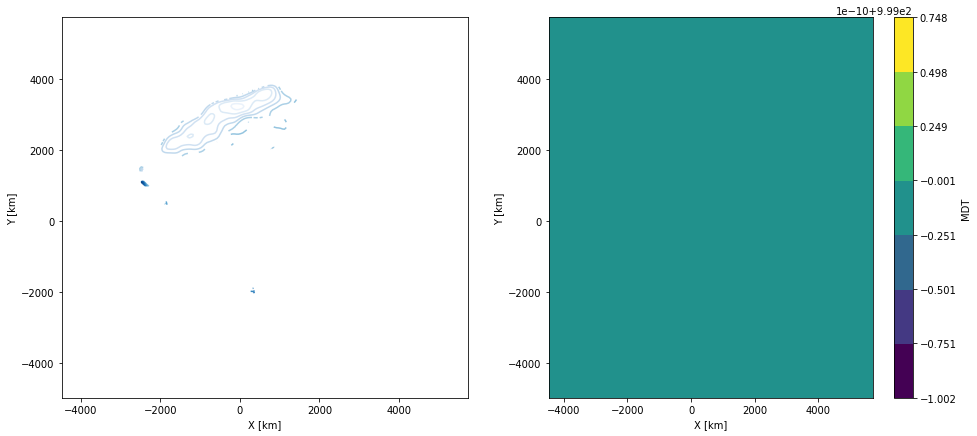

In [27]:
fig, ax = plt.subplots(ncols=2, figsize=(16,7))

light_blue.MDT.mean(dim='month').plot.contour(ax=ax[0], cmap='Blues', levels=15)
dark_blue.MDT.mean(dim='month').plot.contourf(ax=ax[1], levels=10)

Text(0.5,1,'Figure 6b)\nMap of light blue shaded region within -211cm\n& green isoline along -205cm mean DOT')

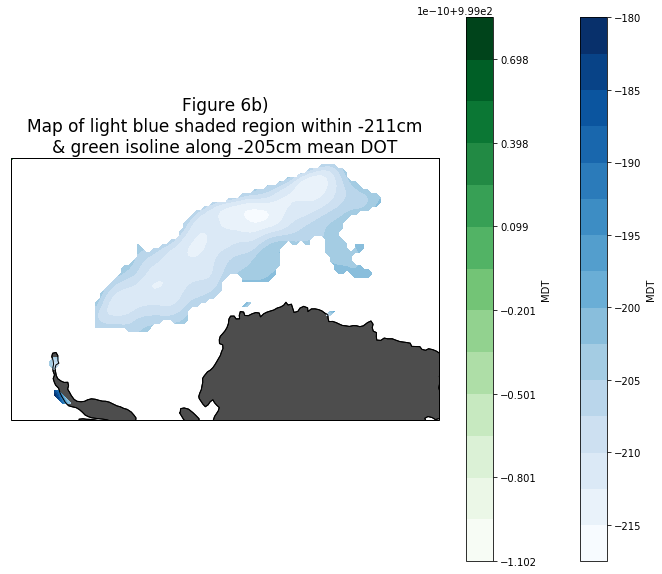

In [28]:
#Isoline along the -205cm mean DOT contour is not showing.

extent = [-50,33,-55,-79]
plt.figure(figsize=(12,10))

ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='0.3', edgecolor='k')
ax.set_extent(extent, crs=ccrs.PlateCarree())

(light_blue.MDT.mean(dim='month')).plot.contourf(x='Longitude', y='Latitude', 
                                                                 transform=ccrs.PlateCarree(), cmap='Blues',
                                                                 levels=15)

(dark_blue.MDT.mean(dim='month')).plot.contourf(x='Longitude', y='Latitude', levels=15,
                                                                 transform=ccrs.PlateCarree(), cmap='Greens')

plt.title("Figure 6b)\nMap of light blue shaded region within -211cm\n& green isoline along -205cm mean DOT"
          , fontsize=17)

#trying to get rest of contour lines to fill map
#ax.contour(SLA_light_blue.Longitude, SLA_light_blue.Latitude, ds.SLA.mean(dim='date'), 
           #transform=ccrs.PlateCarree(), linestyle='solid')

> **Figure 6b) Map.** Gyre depth is calculated as the sea level difference between gyre edge and center - this reflects the variability of wind-driven surface divergence. 

In [29]:
# TAKE OUT SEASONAL CYCLE IN EACH LIGHT BLUE AND DARK BLUE
# THEN SUBTRACT LIGHT BLUE FROM DARK BLUE
gyre_season_out_light_blue = (ds.where(ds.DOT<=-211)).groupby('date.month') - light_blue
gyre_season_out_dark_blue = (ds.where(ds.DOT==-205, 999)).groupby('date.month') - dark_blue

In [30]:
#though caption says light blue minus dark blue, the fig below looks more like the fig in paper
#if I try plotting light - dark then the fig looks even more off
gyre_depth = gyre_season_out_dark_blue - gyre_season_out_light_blue
gyre_depth

<xarray.Dataset>
Dimensions:    (X: 205, Y: 215, date: 72)
Coordinates:
  * X          (X) float32 -4475.0 -4425.0 -4375.0 -4325.0 -4275.0 -4225.0 ...
  * Y          (Y) float32 -4975.0 -4925.0 -4875.0 -4825.0 -4775.0 -4725.0 ...
    Latitude   (Y, X) float32 -33.2011 -33.441322 -33.68056 -33.918777 ...
    Longitude  (Y, X) float32 -138.02869 -138.34859 -138.67169 -138.99803 ...
    Area       (Y, X) float32 1593.5522 1600.7418 1607.8981 1615.0198 ...
  * date       (date) datetime64[ns] 2011-01-01 2011-02-01 2011-03-01 ...
    month      (date) int64 1 2 3 4 5 6 7 8 9 10 11 12 1 2 3 4 5 6 7 8 9 10 ...
Data variables:
    DOT        (date, Y, X) float32 nan nan nan nan nan nan nan nan nan nan ...
    SLA        (date, Y, X) float32 nan nan nan nan nan nan nan nan nan nan ...
    MDT        (Y, X, date) float32 nan nan nan nan nan nan nan nan nan nan ...

(-3.1, 2)

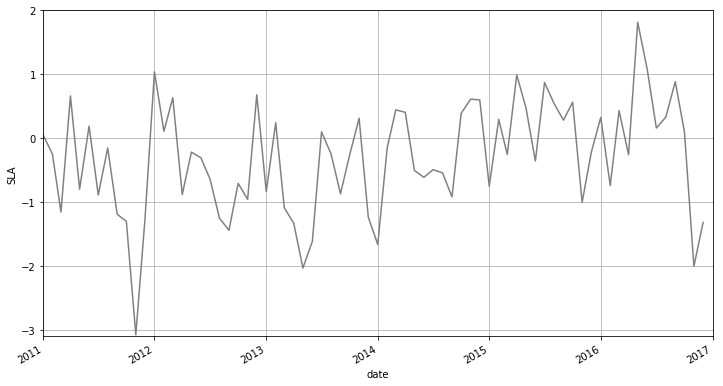

In [31]:
#scaling is way off
gyre_depth.SLA.mean(['Y', 'X']).plot(c='grey', figsize=(12,6))
plt.grid()
plt.xlim('2011', '2017')
plt.ylim(-3.1, 2)

### Calculating Wind Curl (not windstress curl)

In [32]:
u10 = 'http://kage.ldeo.columbia.edu:81/home/.datasets/.ERAInterim/.monthly/.Surface/.u10.nc/.u10/dods'
v10 = 'http://kage.ldeo.columbia.edu:81/home/.datasets/.ERAInterim/.monthly/.Surface/.v10.nc/.v10/dods'


ds_10_orig = xr.open_dataset(u10, decode_times=False).rename({'T':'time', 'X' : 'lon', 'Y' : 'lat'})
ds_10_orig['v10'] = xr.open_dataset(v10, decode_times=False).rename({'T':'time', 'X' : 'lon', 'Y' : 'lat'})['v10']

#fixing time
def fix_calendar(ds_10_orig, timevar='time'):
    if ds_10_orig[timevar].attrs['calendar'] == '360':
        ds_10_orig[timevar].attrs['calendar'] = '360_day'
    return ds_10_orig

ds_10_orig = fix_calendar(ds_10_orig)
ds_10_orig = xr.decode_cf(ds_10_orig)

#fixing lon
ds1 = ds_10_orig.roll(lon=-181).copy()
ds2 = ds1.drop('lon')
lon = ds1.lon.data
lon[lon>180.] -= 360.
ds2.coords['lon'] = ('lon', lon)
ds_10 = ds2
ds_10.lon

<xarray.DataArray 'lon' (lon: 360)>
array([-179., -178., -177., ...,  178.,  179.,  180.], dtype=float32)
Coordinates:
  * lon      (lon) float32 -179.0 -178.0 -177.0 -176.0 -175.0 -174.0 -173.0 ...

In [33]:
ds_10

<xarray.Dataset>
Dimensions:  (lat: 181, lon: 360, time: 468)
Coordinates:
  * lat      (lat) float32 90.0 89.0 88.0 87.0 86.0 85.0 84.0 83.0 82.0 81.0 ...
  * time     (time) datetime64[ns] 1979-01-16 1979-02-16 1979-03-16 ...
  * lon      (lon) float32 -179.0 -178.0 -177.0 -176.0 -175.0 -174.0 -173.0 ...
Data variables:
    u10      (time, lat, lon) float32 0.9557618 0.96134233 0.96652424 ...
    v10      (time, lat, lon) float32 0.25627005 0.23519765 0.21493575 ...
Attributes:
    Conventions:  IRIDL

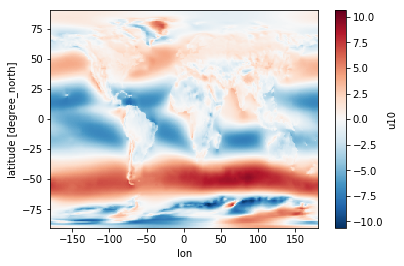

In [34]:
ds_10.u10.mean(dim='time').plot()

Giles et al. (2012)
$$
wind\ curl\ = \bigtriangledown \times (|\mathbf{u_{10}}|\mathbf{u_{10}})
$$

By component form, it breaks down to:
$$
= (\frac{\delta{(v|\mathbf{u}|)}}{\delta{x}} -\frac{\delta{(u|\mathbf{u}|)}}{\delta{y}})\mathbf{\hat{z}}
$$

where: $$ |\mathbf{u}| = \sqrt{u^{2} + v^{2}}$$

In [35]:
#calculating meters per latitudinal degree
earth_circumference = 2*np.pi*6.371e6
meters_per_degree = earth_circumference / 360
meters_per_degree

111194.92664455873

In [36]:
delta_lat = ds_10.lat.diff('lat')
delta_y = delta_lat * meters_per_degree
#delta_y

In [37]:
delta_lon = ds_10.lat.diff('lon')
delta_x = delta_lon * meters_per_degree * np.cos(np.deg2rad(ds_10.lon))
#delta_x

In [38]:
#absolute value of the wind vector
u_abs = np.sqrt((ds_10.u10**2) + (ds_10.v10**2))
#u_abs

In [39]:
vu = ds_10.v10 * u_abs 
uu = ds_10.u10 * u_abs

In [40]:
delta_vu = vu.diff(dim='lon')
#delta_vu

In [41]:
delta_uu = uu.diff(dim='lat')
#delta_uu

Let's remind ourselves of the equation:
$$
wind\ curl\ = (\frac{\delta{(v|\mathbf{u}|)}}{\delta{x}} -\frac{\delta{(u|\mathbf{u}|)}}{\delta{y}})\mathbf{\hat{z}}
$$

In [42]:
wind_curl_1 = (delta_vu / delta_x) - (delta_uu / delta_y)
wind_curl_1

<xarray.DataArray (time: 468, lat: 180, lon: 359)>
array([[[-5.378460e-06, -5.390296e-06, ..., -5.276909e-06, -5.357329e-06],
        [-4.199518e-06, -4.168400e-06, ..., -4.274279e-06, -4.275285e-06],
        ...,
        [ 1.236575e-04,  1.241580e-04, ...,  1.211630e-04,  1.226772e-04],
        [ 3.039786e-05,  3.027522e-05, ...,  3.061002e-05,  3.066123e-05]],

       [[ 2.246428e-06,  2.309349e-06, ...,  2.181035e-06,  2.134100e-06],
        [ 6.778160e-06,  6.855990e-06, ...,  6.483862e-06,  6.656809e-06],
        ...,
        [ 1.022151e-04,  1.020365e-04, ...,  1.022056e-04,  1.025233e-04],
        [ 3.441828e-05,  3.406272e-05, ...,  3.542245e-05,  3.515196e-05]],

       ...,

       [[-4.224948e-06, -4.201720e-06, ..., -4.224362e-06, -4.269901e-06],
        [-3.024100e-06, -3.094023e-06, ..., -2.831278e-06, -2.902915e-06],
        ...,
        [ 3.543767e-04,  3.584306e-04, ...,  3.392548e-04,  3.465662e-04],
        [ 9.623730e-05,  9.753448e-05, ...,  9.309220e-05,  9.384304

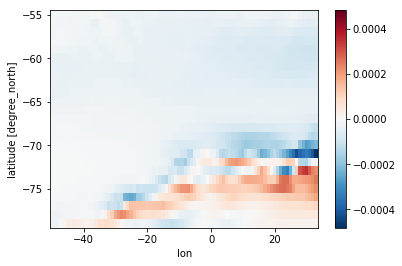

In [43]:
weddell_wind_curl_1 = wind_curl_1.sel(lon=slice(-50,33), lat=slice(-55, -79), time=slice('2011','2016'))
weddell_wind_curl_1.mean('time').plot()

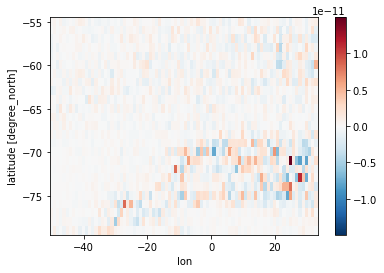

In [44]:
#taking out monthly mean to take out seasonal cycle
weddell_season_out = weddell_wind_curl_1.groupby('time.month') - (weddell_wind_curl_1.groupby('time.month')
                                                                                 .mean(dim='time'))
weddell_season_out.mean(dim='time').plot()

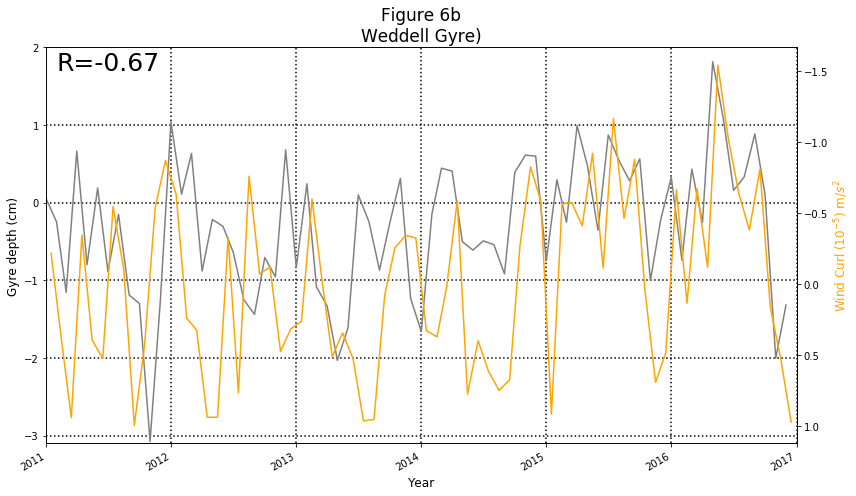

In [45]:
fig, ax1 = plt.subplots(figsize=(12,7))

gyre_depth.SLA.mean(['Y', 'X']).plot(c='grey', ax=ax1)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_xlim('2011', '2017')
ax1.set_ylabel('Gyre depth (cm)', fontsize=12, color='k')
ax1.set_ylim(-3.1, 2)
ax1.grid(linestyle='dotted', linewidth=1.5, c='k')
ax1.text(0, 0.77, 'R=-0.67', horizontalalignment='center', verticalalignment='center', 
         transform=ax.transAxes, fontsize=25)

ax2 = ax1.twinx()
(weddell_season_out*1e5).mean(['lat','lon']).plot(c='orange', ax=ax2)
ax2.invert_yaxis()
ax2.set_ylabel('Wind Curl ($10^{-5}$) m/$s^{2}$', fontsize=12, color='orange')

plt.title('Figure 6b\nWeddell Gyre)', fontsize=17, fontweight=20)
fig.tight_layout()

**Figure 6b).** The depth variability(cm), and nonseasonal wind curl($10^{-5}$ $m/s^{2}$) for Weddell Gyre. 
>The grey is the gyre depth variability and orange is the wind curl variability over the same time period. Seasonal cycle was taken out of both. Thi figure is supposed to express the role of the wind forcing on gyre depth. The paper uses the wind curl instead of the windstress curl as surface atmospheric forcing metric in order to "isolate the influence of wind variability in a region where the surface drag coefficient is heavily modified by the presence of sea ice in ways that may not be well-represented in reanalyses". From the correlation coefficient, one can see that the gyre depth variability and wind intensity and direction are highly anti-correlated - meaning when westerlies strengthen (+SAM) gyre depth increase (gyre circulatin intensifies leading to greater Ekamn pumping).

## Fig 7a)
Average over seasons: summer-(JFM), **autumn-(AMJ)**, winter-(JAS), **spring-(OND)**

In [46]:
SLA_mm = ds.SLA.groupby('date.quarter').mean(dim='date')
SLA_mm

<xarray.DataArray 'SLA' (quarter: 4, Y: 215, X: 205)>
array([[[      nan,  0.330837, ...,       nan,       nan],
        [ 3.359751,  1.577482, ...,       nan,       nan],
        ...,
        [ 1.752074,  2.990556, ...,       nan,       nan],
        [      nan,  0.249112, ...,       nan,       nan]],

       [[      nan,  2.811668, ...,       nan,       nan],
        [ 6.955294,  3.061496, ...,       nan,       nan],
        ...,
        [ 0.233814,  0.821021, ...,       nan,       nan],
        [      nan,  2.398373, ...,       nan,       nan]],

       [[      nan, -0.93662 , ...,       nan,       nan],
        [-2.258514, -2.763652, ...,       nan,       nan],
        ...,
        [ 2.238205, -2.448897, ...,       nan,       nan],
        [      nan, -0.046635, ...,       nan,       nan]],

       [[      nan, -3.801111, ...,       nan,       nan],
        [-2.894178, -2.307115, ...,       nan,       nan],
        ...,
        [      nan, -1.378603, ...,       nan,       nan],
   

In [47]:
#to examine if quarter started in Jan or Dec...
ds.SLA.date.dt.quarter
#and indeed it does

<xarray.DataArray 'quarter' (date: 72)>
array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4,
       1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4,
       1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])
Coordinates:
  * date     (date) datetime64[ns] 2011-01-01 2011-02-01 2011-03-01 ...

In [48]:
# AMJ(autumn) - OND(spring)
SLA_diff = SLA_mm.sel(quarter=2) - SLA_mm.sel(quarter=4)
SLA_diff

<xarray.DataArray 'SLA' (Y: 215, X: 205)>
array([[     nan, 6.612779, 7.278175, ...,      nan,      nan,      nan],
       [9.849471, 5.368611, 5.917192, ...,      nan,      nan,      nan],
       [4.222669, 4.625763, 5.068721, ...,      nan,      nan,      nan],
       ...,
       [3.854239, 2.265239, 2.693987, ...,      nan,      nan,      nan],
       [     nan, 2.199624, 2.658269, ...,      nan,      nan,      nan],
       [     nan, 5.107754, 2.528386, ...,      nan,      nan,      nan]],
      dtype=float32)
Coordinates:
  * X          (X) float32 -4475.0 -4425.0 -4375.0 -4325.0 -4275.0 -4225.0 ...
  * Y          (Y) float32 -4975.0 -4925.0 -4875.0 -4825.0 -4775.0 -4725.0 ...
    Latitude   (Y, X) float32 -33.2011 -33.441322 -33.68056 -33.918777 ...
    Longitude  (Y, X) float32 -138.02869 -138.34859 -138.67169 -138.99803 ...
    Area       (Y, X) float32 1593.5522 1600.7418 1607.8981 1615.0198 ...

Text(0.5,1,'Figure 7a)\nAutumn-spring difference (cm)')

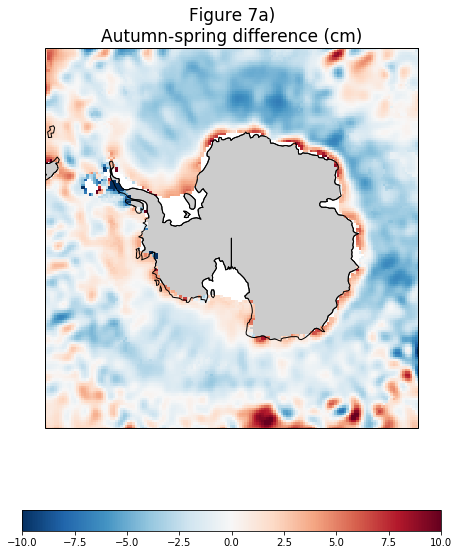

In [49]:
extent = [-180,180,-55,-90]
plt.figure(figsize=(15,10))

ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='0.8', edgecolor='k')
ax.set_extent(extent, crs=ccrs.PlateCarree())

cs = ax.pcolormesh(SLA_diff.Longitude, SLA_diff.Latitude, SLA_diff, transform=ccrs.PlateCarree(), 
                   cmap='RdBu_r', vmin=-10, vmax=10,)

plt.colorbar(cs, orientation='horizontal', shrink=0.5)
plt.title('Figure 7a)\nAutumn-spring difference (cm)', fontsize=17)

**Figure 7a).** The sea level difference (cm) between autumn (AMJ) and spring (OND).
>Westward flowing ASC (Antarctic Slope Current) is strongest in aumtumn and weakest in spring. Coastal sea-level is higher in autumn than in spring. At least for the Weddell Gyre this could be due to the fact that strong winter winds are blowing water towards southwest creating a build-up if you will and causing the water column height to increase along the coasts of Weddell Sea.

## Figure 10 a)

In [50]:
ds.SLA

<xarray.DataArray 'SLA' (date: 72, Y: 215, X: 205)>
array([[[      nan, -3.29174 , ...,       nan,       nan],
        [-3.469368, -2.889778, ...,       nan,       nan],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan, -3.646484, ...,       nan,       nan],
        ...,
        [      nan,  4.681908, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       ...,

       [[      nan,       nan, ...,       nan,       nan],
        [-2.658859, -2.367737, ...,       nan,       nan],
        ...,
        [      nan, -1.910904, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,  0.415253, ...,       nan,       nan],
        ...,
        [      nan, -6.129494, ...,       nan,     

In [51]:
nino = ds.SLA.sel(date=slice('2015-06','2016-04')).mean(dim='date')
nino

<xarray.DataArray 'SLA' (Y: 215, X: 205)>
array([[      nan,  1.3895  , -0.250468, ...,       nan,       nan,       nan],
       [ 0.420389, -0.478313, -0.606264, ...,       nan,       nan,       nan],
       [-0.500144, -0.501954, -0.575473, ...,       nan,       nan,       nan],
       ...,
       [ 2.901641,  2.215914,  2.240675, ...,       nan,       nan,       nan],
       [ 2.62042 ,  2.817097,  2.795881, ...,       nan,       nan,       nan],
       [      nan,  3.289053,  3.245643, ...,       nan,       nan,       nan]],
      dtype=float32)
Coordinates:
  * X          (X) float32 -4475.0 -4425.0 -4375.0 -4325.0 -4275.0 -4225.0 ...
  * Y          (Y) float32 -4975.0 -4925.0 -4875.0 -4825.0 -4775.0 -4725.0 ...
    Latitude   (Y, X) float32 -33.2011 -33.441322 -33.68056 -33.918777 ...
    Longitude  (Y, X) float32 -138.02869 -138.34859 -138.67169 -138.99803 ...
    Area       (Y, X) float32 ...

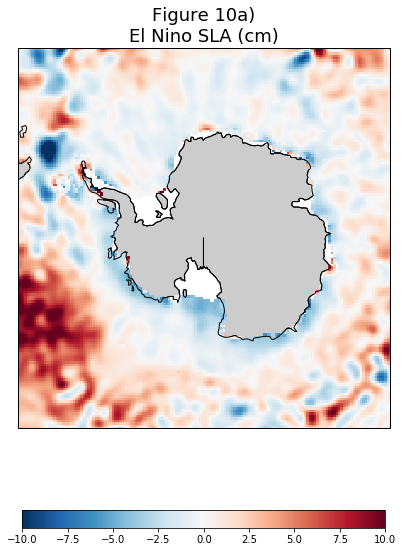

In [52]:
#having trouble plotting contours once again

extent = [-180,180,-55,-90]
plt.figure(figsize=(13,10))

ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='0.8', edgecolor='k')
ax.set_extent(extent, crs=ccrs.PlateCarree())

pcm = ax.pcolormesh(nino.Longitude, nino.Latitude, nino, transform=ccrs.PlateCarree(), cmap='RdBu_r', 
                                                                                vmin=-10, vmax=10,)
plt.colorbar(pcm, orientation='horizontal', shrink=0.5)
plt.title('Figure 10a)\nEl Nino SLA (cm)', fontsize=18);

#nino.plot.contour(x='Longitude', y='Latitude', levels=20)
#plt.show()

**Figure 10a).** June 2015 to April 2016 time-mean sea level anomaly (cm) associated with the peak of the 2015–2016 El Niño event. 
>The negative sea level anomalies along the coasts of southern Antarctica during this El Niño event is the cause of decreased Ekman transport. The negative anomaly "could imply shoaling of isopycnals; however, the ASC can be strongly barotropic (Nunez-Riboni & Fahrbach, 2009), so reduced DOT gradients could also correspond to a weak- ened barotropic flow with no baroclinic response". The paper goes on to state that the data suggests Southern Oscillation wind forcing does not affect coastal sea level and the strength of the ASC over the Pacific sector of continental shelf.

# END

Geostrophic Current:
$$
\mathbf{u_g} = \frac{f}{g}( \mathbf{\hat{k}} \times \nabla_{H}H_{DOT})
$$

where the dynamic ocean topography (DOT) 
is the SSH relative to the geoid:

$$
H_{DOT} = H_{SSH} - H_{geoid} = A-(R+\sum{H_{CORR}}) - H_{geoid}
$$

Broken up into component form:
$$
\mathbf{u_g} = \frac{f}{g}(\frac{\delta{DOT^{y}}}{\delta{x}} - \frac{\delta{DOT^{x}}}{\delta{y}})
$$

In [53]:
#Do we calculate f with ds.Latitude or ds.Y? I think ds.Latitude
g = 9.81 #m/s-2
omega = 7.2921159e-5 #rad/sec
f = 2*omega*np.sin(ds.Latitude) #s-1

In [54]:
! wget http://kage.ldeo.columbia.edu/data/ERA-1deg/taux-ERA.nc
! wget http://kage.ldeo.columbia.edu/data/ERA-1deg/tauy-ERA.nc

--2018-12-12 00:51:15--  http://kage.ldeo.columbia.edu/data/ERA-1deg/taux-ERA.nc
Resolving kage.ldeo.columbia.edu (kage.ldeo.columbia.edu)... 129.236.21.133
Connecting to kage.ldeo.columbia.edu (kage.ldeo.columbia.edu)|129.236.21.133|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 187406468 (179M) [application/x-netcdf]
Saving to: ‘taux-ERA.nc’

taux-ERA.nc         100%[===================>] 178.72M  10.3MB/s    in 17s     

2018-12-12 00:51:32 (10.7 MB/s) - ‘taux-ERA.nc’ saved [187406468/187406468]

--2018-12-12 00:51:33--  http://kage.ldeo.columbia.edu/data/ERA-1deg/tauy-ERA.nc
Resolving kage.ldeo.columbia.edu (kage.ldeo.columbia.edu)... 129.236.21.133
Connecting to kage.ldeo.columbia.edu (kage.ldeo.columbia.edu)|129.236.21.133|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 187406176 (179M) [application/x-netcdf]
Saving to: ‘tauy-ERA.nc’

tauy-ERA.nc         100%[===================>] 178.72M  11.2MB/s    in 16s     

2018-12-12 00:5

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/stb2145/rces-finalproject/master)